# 1. Create a friend network which satisfies the following requirements:
+ This is a weighted graph.
+ Each friend is a node.
+ The edge between two nodes is the distance between their homes.
+ Your friends can be connected.
+ The graph contains at least 20 people.
+ Visualize your graph using spring and circular layouts.

** Following the sample graph in practice, you can create a sample friend network (do not need to be a real network).


In [1]:
!pip install networkx pandas numpy matplotlib scipy
import networkx as nx
import numpy as np
from random import sample
import matplotlib.pyplot as plt

{('Enma', 'Ana'): Text(-0.33956811793638586, 0.3928903843228399, '74'),
 ('Enma', 'Lyly'): Text(-0.42381053008300906, 0.8844263700221113, '525'),
 ('Ana', 'Robert'): Text(-0.09783973186981647, -0.04422561980376489, '962'),
 ('Ana', 'Nico'): Text(-0.10886830795292252, -0.11301691123236984, '283'),
 ('Lyly', 'Mark'): Text(-0.21646049105477033, 0.9325521903218806, '363'),
 ('Robert', 'Nico'): Text(-0.01418690946787258, -0.17417055963759173, '602'),
 ('Robert', 'Brock'): Text(0.045483566130029254, -0.2214591412166551, '727'),
 ('Nico', 'Mono'): Text(-0.0883432850198938, -0.3830788043531946, '727'),
 ('Nico', 'Tino'): Text(-0.00868491119303869, -0.365744682461614, '724'),
 ('Nico', 'Jack'): Text(-0.0020597772374243793, -0.008295647360432423, '457'),
 ('Nico', 'Brock'): Text(0.03445499004692321, -0.29025043264526007, '870'),
 ('Bin', 'Mono'): Text(-0.39129691206195477, -0.5413333720242864, '39'),
 ('Bin', 'Mie'): Text(-0.4906903420311195, -0.4623162690181368, '364'),
 ('Mono', 'Tino'): Text(

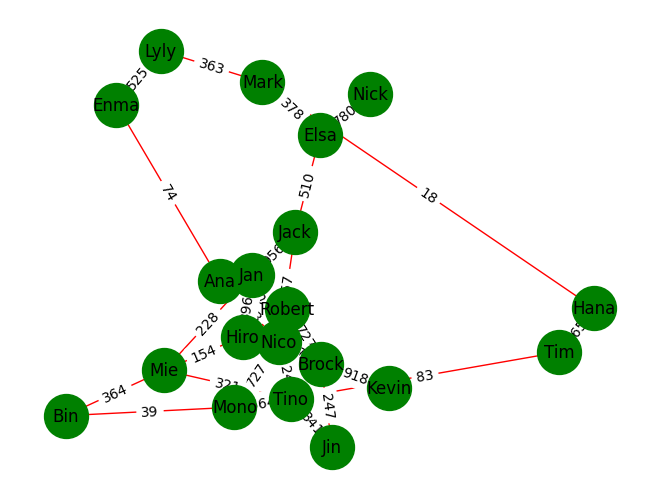

In [11]:
edges = [
        ("Enma", "Ana",  74), 
        ("Enma", "Lyly",  525), 
        ("Ana", "Robert",  962), 
        ("Ana", "Nico",  283), 
        ("Bin", "Mono",  39), 
        ("Bin", "Mie",  364), 
        ("Mono", "Nico",  727), 
        ("Mono", "Tino",  664), 
        ("Nico", "Tino",  724), 
        ("Nico", "Jack",  457), 
        ("Nico", "Brock",  870), 
        ("Nico", "Robert",  602), 
        ("Jack", "Elsa",  510), 
        ("Jack", "Jan",  956), 
        ("Elsa", "Nick",  780), 
        ("Elsa", "Mark",  378), 
        ("Tino", "Mie",  321), 
        ("Tino", "Jin",  341), 
        ("Tino", "Tim",  83), 
        ("Hiro", "Mie",  154), 
        ("Hiro", "Brock",  959), 
        ("Hiro", "Jan",  396), 
        ("Mie", "Jan",  228), 
        ("Robert", "Brock",  727), 
        ("Jin", "Brock",  247), 
        ("Brock", "Kevin",  918), 
        ("Hana", "Mark",  18), 
        ("Hana", "Tim",  765), 
        ("Mark", "Lyly",  363)
]


graph = nx.Graph()
graph.add_weighted_edges_from(edges)

options = {
    'node_color': "green",       # color of node
    'node_size': 1000,          # size of node
    'width': 1,                 # line width of edges
    'arrowsize': 18,            # size of arrow
    'edge_color':'red',         # edge color
}

# Spring layout
pos = nx.spring_layout(graph)

nx.draw(graph, pos, with_labels = True, arrows=True, **options)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

{('Enma', 'Ana'): Text(0.9755282586094334, 0.15450851254631864, '74'),
 ('Enma', 'Lyly'): Text(0.9045084908399321, 0.2938926313936037, '525'),
 ('Ana', 'Robert'): Text(0.7694208833471194, 0.5590170084528431, '962'),
 ('Ana', 'Nico'): Text(0.6300367495986734, 0.6300367762223443, '283'),
 ('Lyly', 'Mark'): Text(0.24999993865672251, -0.18163560248010008, '363'),
 ('Robert', 'Nico'): Text(0.44840110400441596, 0.8800367728943854, '602'),
 ('Robert', 'Brock'): Text(-0.20610737367298865, 0.40450846550697206, '727'),
 ('Nico', 'Mono'): Text(-2.821299660560328e-08, 0.9510565108615648, '727'),
 ('Nico', 'Tino'): Text(-0.2500000099838768, 0.7694208950696294, '724'),
 ('Nico', 'Jack'): Text(-0.3210197479510561, 0.6300367911235054, '457'),
 ('Nico', 'Brock'): Text(-0.34549150742143464, 0.47552823327647337, '870'),
 ('Bin', 'Mono'): Text(-0.15450853440201276, 0.9755282405296215, '39'),
 ('Bin', 'Mie'): Text(-0.2938926383481369, 0.9045085025624421, '364'),
 ('Mono', 'Tino'): Text(-0.5590170084528434,

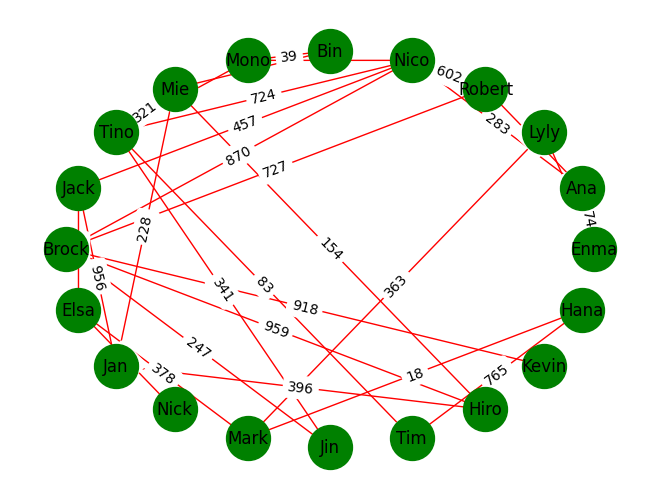

In [12]:
# set circular layout
pos = nx.circular_layout(graph)

nx.draw(graph, pos, with_labels = True, arrows=True, **options)
labels = nx.get_edge_attributes(graph,'weight')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

# 2. Draw Betweenness Centrality in graph:
+ Load CE_KT graph from the file: [data/CE-HT.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2023/blob/main/W4/data/CE-HT.txt) in the class github.
+ Draw betweenness centrality in graph with 2 type of layouts: Spring layout and Circular layout.
+ Save the figures of each layouts.

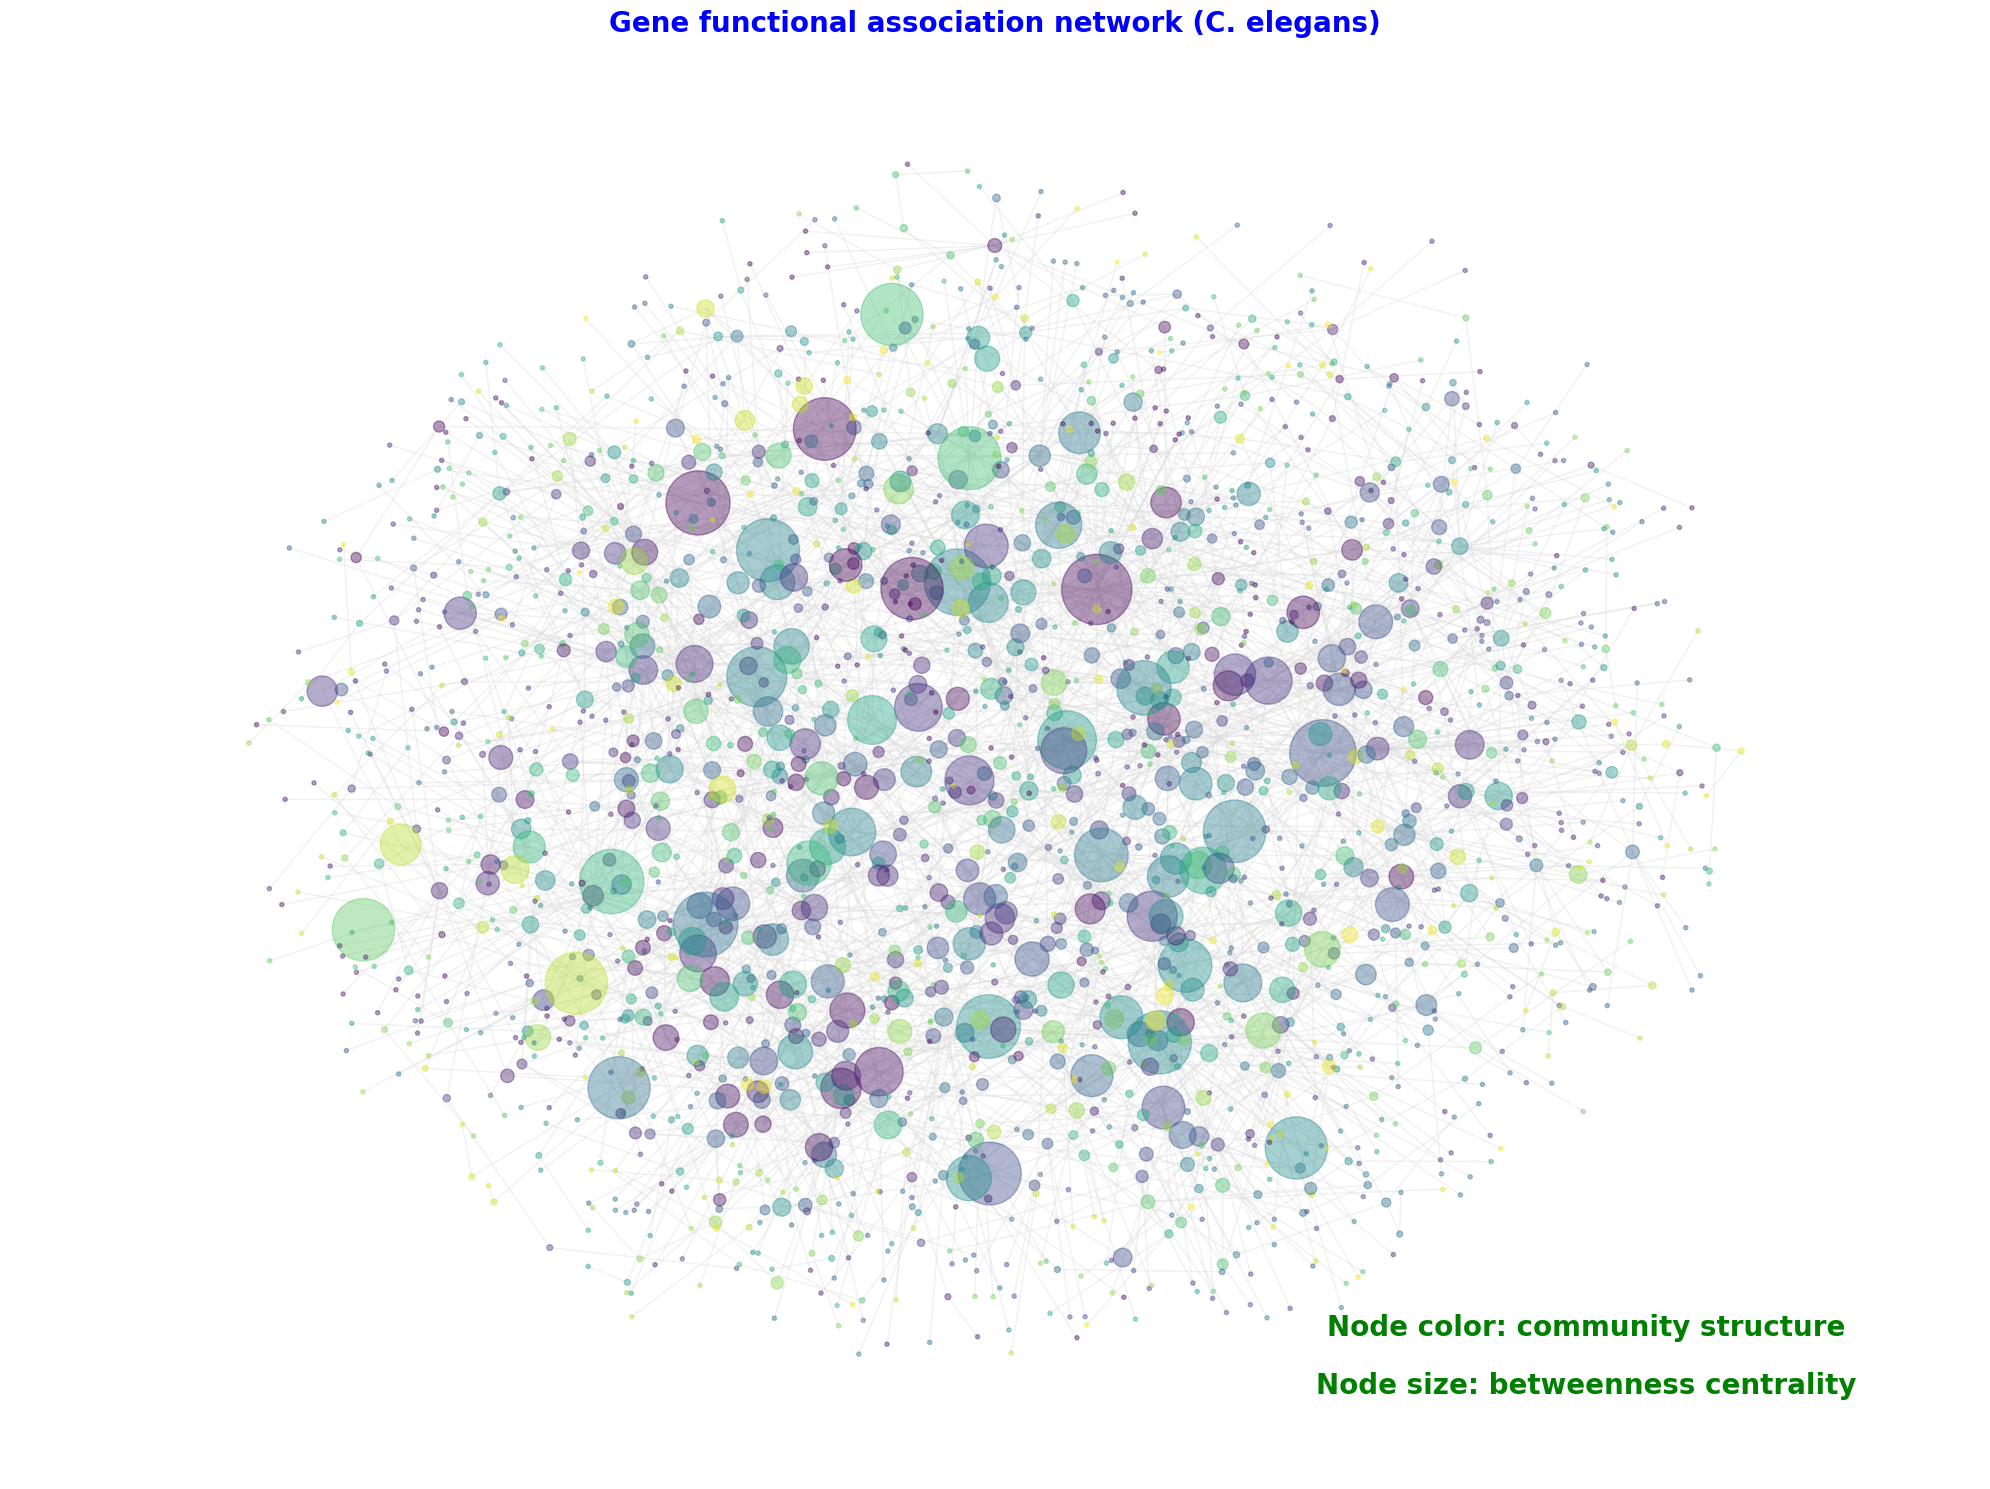

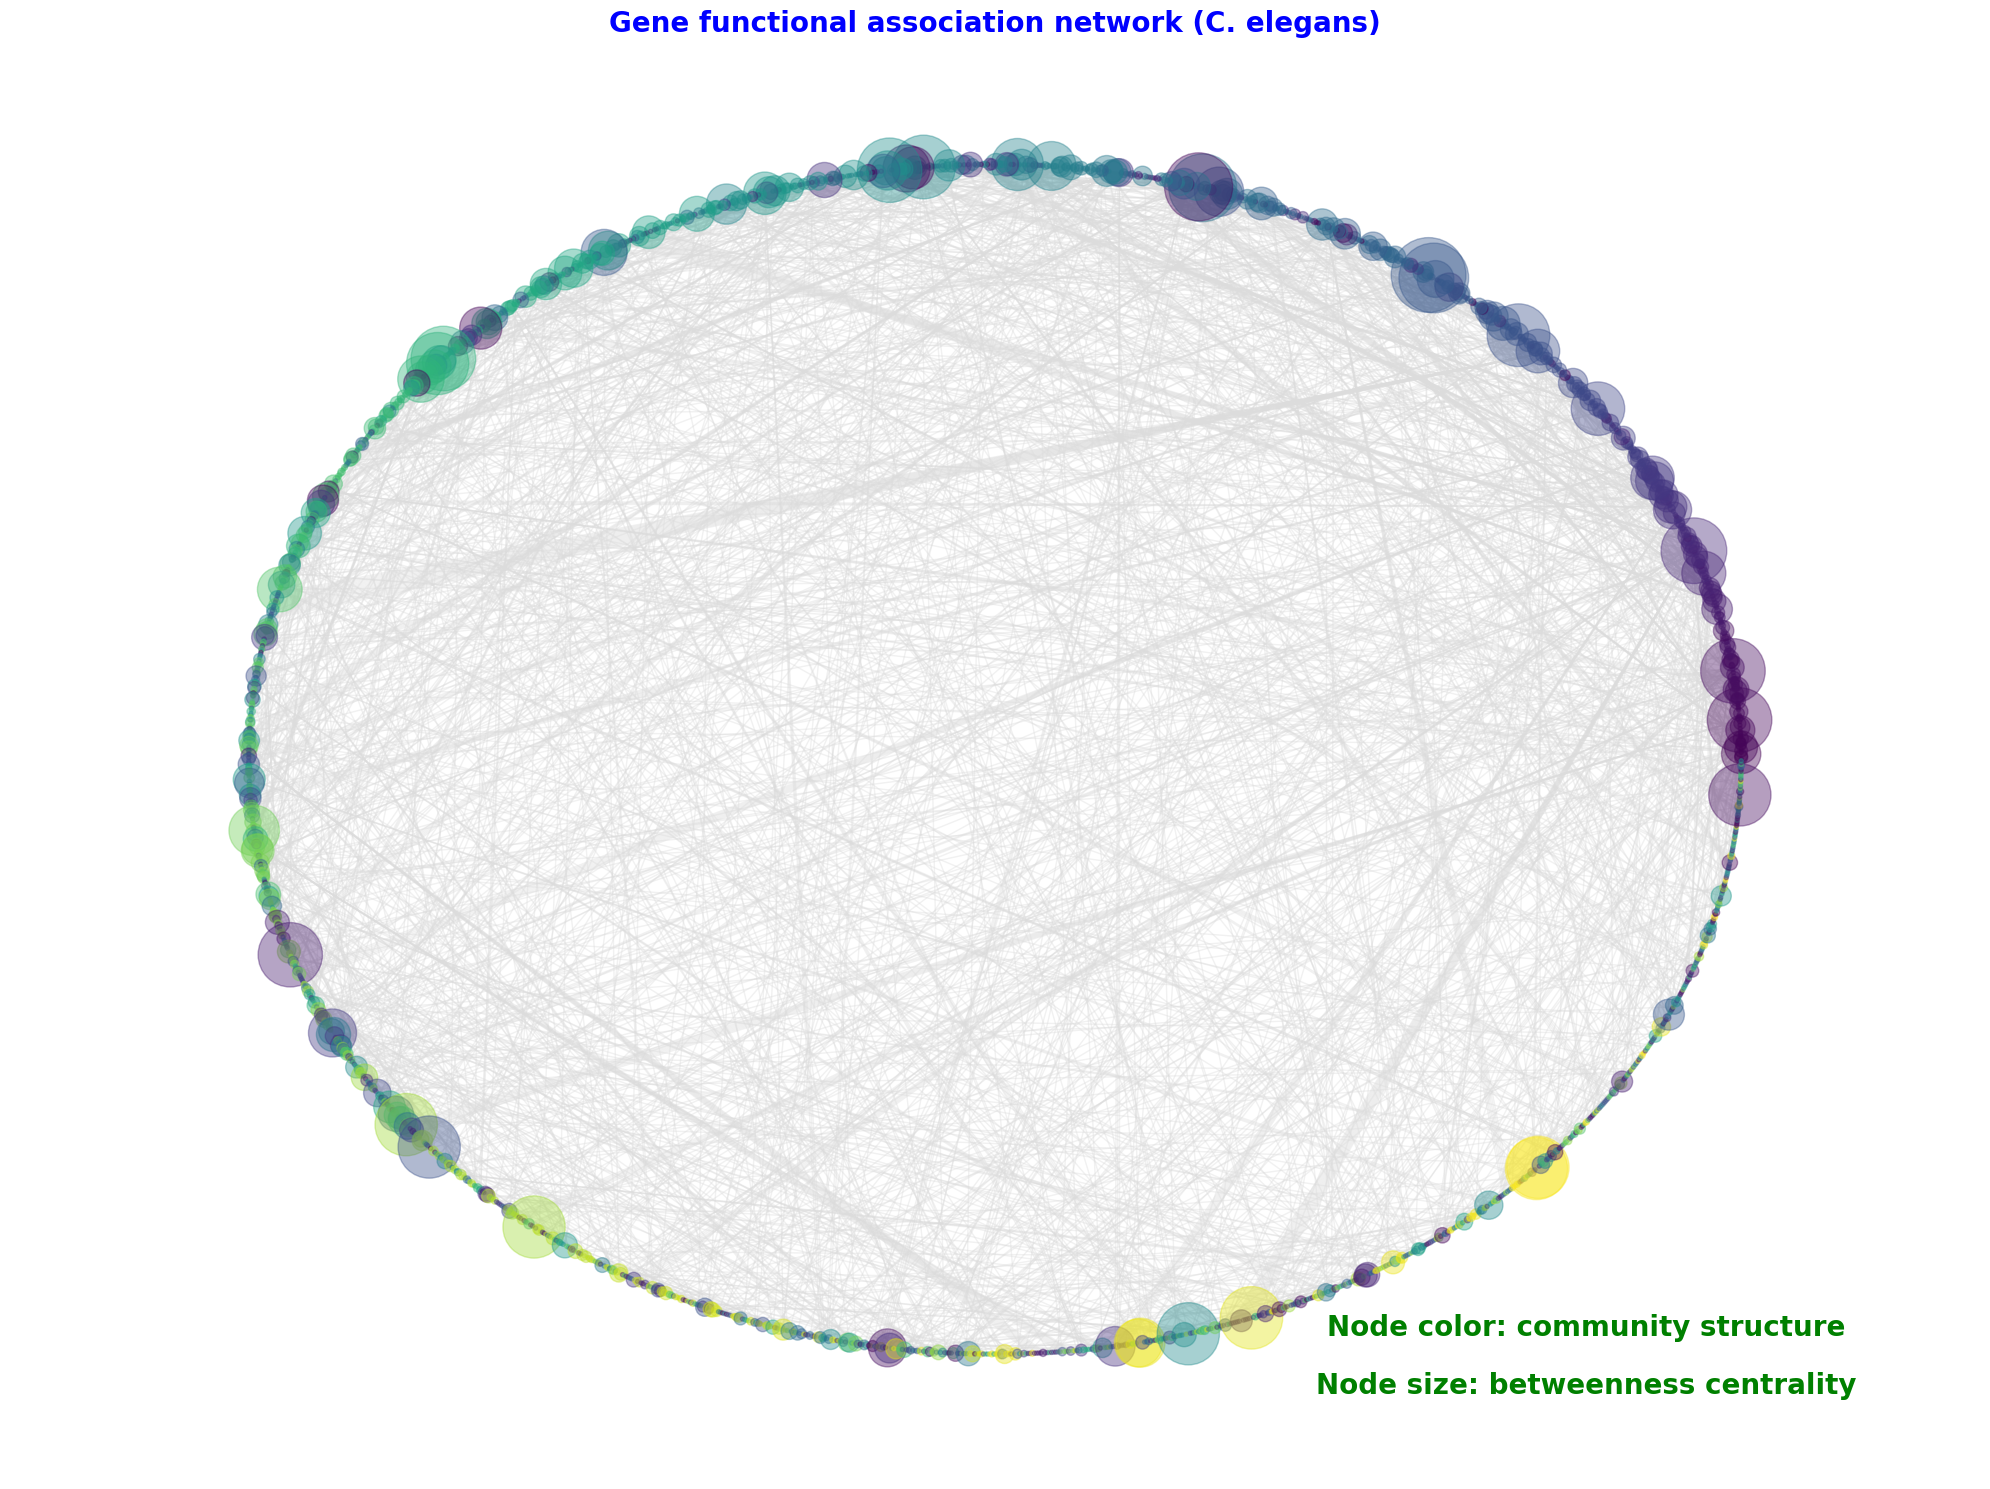

In [6]:
# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component, pos):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=False,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Gene functional association network (C. elegans)", font)
    # Change font color for legend
    font["color"] = "green"

    ax.text(
        0.80,
        0.10,
        "Node color: community structure",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )
    ax.text(
        0.80,
        0.06,
        "Node size: betweenness centrality",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )

    # Resize figure for label readability
    ax.margins(0.1, 0.05)
    fig.tight_layout()
    plt.axis("off")
    plt.show()
    
# Read graph data from edgelist
G = nx.read_weighted_edgelist("data/CE-HT.txt")

# Spring layout
largest_component = get_largest_component(G)
pos = nx.spring_layout(largest_component, k=0.15)
draw_graph_betweenness_centrality(G, largest_component, pos)

# Circular layout
pos = nx.circular_layout(largest_component)
draw_graph_betweenness_centrality(G, largest_component, pos)

# 3. Complete the following requirements:
### 3.1. Load graph from edge-list file [data/WormNet.v3.benchmark.txt](https://github.com/NSLab-CUK/Graph-Mining-Spring-2023/blob/main/W4/data/WormNet.v3.benchmark.txt)
### 3.2. Then, you store this graph in a gexf file.
### 3.3. Finally, you load this file in Gephi and compute Centrality methods to visualize your graph and save figures for them. Visualizing your graph in circular and spring layouts combining with these methods:
+ Betweenness Centrality
+ Degree
+ Eigen Centrality

In [7]:
# Read graph data from edgelist
G = nx.read_edgelist("data/WormNet.v3.benchmark.txt")
# Store in a gexf file
nx.write_gexf(G, "WormNet.gexf")

### Load file in gephi and save figures
Check the results in this folder: [Gephi](https://github.com/NSLab-CUK/Graph-Mining-Spring-2023/blob/main/W4/gephi/)